### Word Embedding Techniques
Word Embeddings are the texts converted into numbers.
A Word Embedding format generally tries to map a word using a dictionary to a vector. Let us break this sentence down into finer details to have a clear view.

"Word Embeddings are Words converted into numbers"

A dictionary is the list of all unique words in the sentence. So, a dictionary may look like – ['Word','Embeddings','are','word','Converted','into','numbers']

A vector representation of a word may be a one-hot encoded vector where 1 stands for the position where the word exists and 0 everywhere else. The vector representation of "numbers" in this format according to the above dictionary is [0,0,0,0,0,1] and "converted" is[0,0,0,1,0,0].

### Types of Word Embeddings
1.Frequency based Embedding

2.Prediction based Embedding

### Frequency based Embedding
1. Count Vector
2. TF-IDF Vector


#### Count Vectorizer

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The
N tokens will form our dictionary and the size of the Count Vector matrix M will be given by D X N. 
Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is lazy boy. She is also lazy.

D2: Neeta is lazy person.

The dictionary created may be a list of unique tokens(words) in the corpus =
['He','is','She','lazy','boy','also','Neeta','person']
Here, D=2, N=8
The count matrix M of size 2 X 8 will be represented as –
He She lazy boy Neeta person

D1 1 2 1 2 1 1 0 0

D2 0 1 0 1 0 0 1 1


In [7]:
#Count Vectorizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

document = ["He is lazy boy. She is also lazy.",
            "Neeta is lazy person."]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", sorted(vectorizer.vocabulary_))

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  ['also', 'boy', 'he', 'is', 'lazy', 'neeta', 'person', 'she']
Encoded Document is:
[[1 1 1 2 2 0 0 1]
 [0 0 0 1 1 1 1 0]]


#### TF-IDF Vectorizer
It is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. 
TF-IDF works by penalising common words like ('the','a','is') by assigning them lower weights while giving importance
to significant words in a particular document.



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
d1="He is lazy boy. She is also lazy."

d2="Neeta is lazy person."

doc_corpus=[d1,d2]

# create object
tfidf = TfidfVectorizer(stop_words='english')


# Get TF-IDF values
tfidf_matrix = tfidf.fit_transform(doc_corpus)


# get idf values
print('\nidf values:')
dic = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
print(dic)


# Create a dataframe for the TF-IDF values
df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
df.index = ["Document 1", "Document 2"]

# Print the TF-IDF table
print("TF-IDF values:")
print(df)


idf values:
{'boy': 1.4054651081081644, 'lazy': 1.0, 'neeta': 1.4054651081081644, 'person': 1.4054651081081644}
TF-IDF values:
                 boy      lazy     neeta    person
Document 1  0.574962  0.818180  0.000000  0.000000
Document 2  0.000000  0.449436  0.631667  0.631667


### Prediction based Embedding
1. CBOW
2. Skip-gram

In [9]:
!pip install nltk
!pip install gensim==3.8.3

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [589 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/interfaces.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/downloader.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/matutils.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/utils.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      copying gensim/nosy.py -> build/lib.macosx-10.9-x86_64-cpython-39/gensim
      creating build/lib.macosx-10.9-x86_64-cpython-39/gensim/simila

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/swetas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### CBOW
CBOW model predicts the current word given context words within a specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent the current word present at the output layer. 

corpus C = “Hey, this is sample corpus using only one context word.” context window of 1

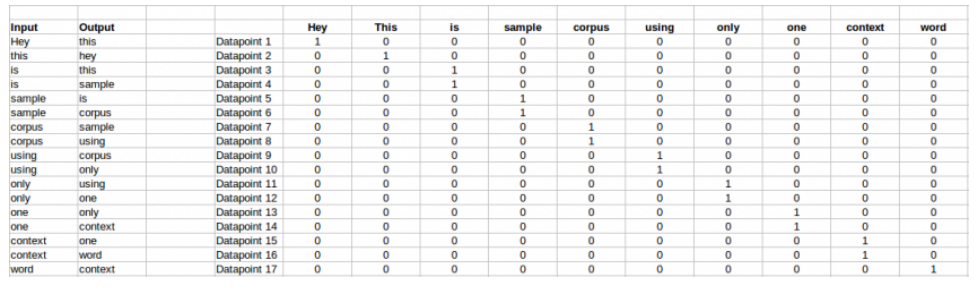

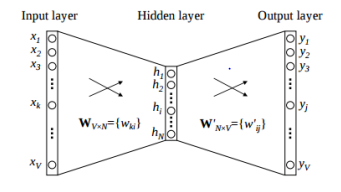



#### Skip-gram

Skip – gram follows the same topology as of CBOW. It just flips CBOW’s architecture on its head. 

The aim of skip-gram is to predict the context given a word. The same corpus that we built our CBOW
model on C=”Hey, this is sample corpus using only one context word.” The training data is as below
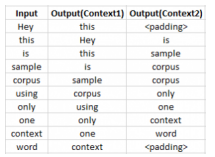

CBOW vs Skip-gram 

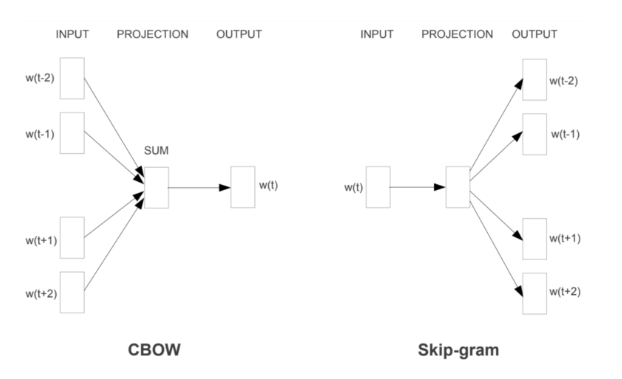


##### CBOW

In [11]:
# Python program to generate word vectors using Word2Vec
import pandas as pd
import nltk
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec
df = pd.DataFrame({'Rating': [3,5,1,2],
                   'Text': ["I love sunflowers",
                            "Sunflowers fill my heart with joy",
                            "I love to look into the garden and see the flowers",
                            "Flowers especially sunflowers are the most beautiful"]})
df['Text_Tokenized'] = df['Text'].str.lower().apply(word_tokenize)
vector_size_n_w2v = 5

w2v_model = Word2Vec(vector_size=vector_size_n_w2v,
                     window=3,
                     min_count=1,
                     sg=0) # 0=CBOW, 1=Skip-gram

print(w2v_model)






Word2Vec(vocab=0, vector_size=5, alpha=0.025)


In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Sample texts
texts = [
    "I love sunflowers",
    "Sunflowers fill my heart with joy",
    "I love to look into the garden and see the flowers",
    "Flowers especially sunflowers are the most beautiful"
]

# Tokenize the texts
tokenized_texts = [text.lower().split() for text in texts]

# Train the Word2Vec model
model = Word2Vec(tokenized_texts, vector_size=5, window=3, min_count=1)

# Extract word vectors
word_vectors = model.wv

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors.vectors)

# Visualize word embeddings
#creates a new figure with a specified size (width: 10 inches, height: 6 inches) to hold the plot.
plt.figure(figsize=(10, 6))
#creates a scatter plot using the reduced 2D word vectors, plot the values in the first column of word_vectors_2d on the x-axis and the values in the second column on the y-axis. 
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
#For each word annotate the corresponding point on the scatter plot with the word label using plt.annotate(). 
#The xy parameter specifies the coordinates of the annotation, which are the values from word_vectors_2d for the current word. The fontsize parameter sets the font size of the annotations to 10.
for i, word in enumerate(word_vectors.index_to_key):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Word Embeddings Visualization using PCA")
plt.show()



NameError: name 'PCA' is not defined

In [ ]:
w2v_model.build_vocab(df['Text_Tokenized'])
print(w2v_model)

In [ ]:
w2v_model.train(df['Text_Tokenized'], 
                total_examples=w2v_model.corpus_count, 
                epochs=5)

In [ ]:
w2v_model.wv.index_to_key

In [ ]:
# Output of the calculated vector for a given word from the vocabulary:
(w2v_model.wv['sunflowers'])

##### Skip gram

In [ ]:
w2v_model_sg = Word2Vec(
                     window=3,
                     min_count=1,
                     sg=1) # 0=CBOW, 1=Skip-gram

print(w2v_model_sg)

In [ ]:
w2v_model_sg.build_vocab(df['Text_Tokenized'])
print(w2v_model_sg)

In [ ]:
w2v_model_sg.train(df['Text_Tokenized'], 
                total_examples=w2v_model_sg.corpus_count, 
                epochs=5)

In [ ]:
w2v_model_sg.wv.index_to_key

In [ ]:
# Output of the calculated vector for a given word from the vocabulary:
(w2v_model_sg.wv['sunflowers'])

# Semantics and Word Vectors

It is important to note that *building* useful models takes a long time - hours or days to train a large corpus - and that for our purposes it is best to import an existing model rather than take the time to train our own.


___
# Installing Larger spaCy Models
Up to now we've been using spaCy's smallest English language model, [**en_core_web_sm**](https://spacy.io/models/en#en_core_web_sm) (35MB), which provides vocabulary, syntax, and entities, but not vectors. To take advantage of built-in word vectors we'll need a larger library. We have a few options:
> [**en_core_web_md**](https://spacy.io/models/en#en_core_web_md) (116MB) Vectors: 685k keys, 20k unique vectors (300 dimensions)
> <br>or<br>
> [**en_core_web_lg**](https://spacy.io/models/en#en_core_web_lg) (812MB) Vectors: 685k keys, 685k unique vectors (300 dimensions)

If you plan to rely heavily on word vectors, consider using spaCy's largest vector library containing over one million unique vectors:
> [**en_vectors_web_lg**](https://spacy.io/models/en#en_vectors_web_lg) (631MB) Vectors: 1.1m keys, 1.1m unique vectors (300 dimensions)

For our purposes **en_core_web_md** should suffice.

### From the command line (you must run this as admin or use sudo):

> `activate spacyenv`&emsp;*if using a virtual environment*   
> 
> `python -m spacy download en_core_web_md`  
> `python -m spacy download en_core_web_lg`&emsp;&emsp;&ensp;*optional library*  
> `python -m spacy download en_vectors_web_lg`&emsp;*optional library*  

> ### If successful, you should see a message like: 
> <tt><br>
> **Linking successful**<br>
> C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_md --><br>
> C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en_core_web_md<br>
> <br>
> You can now load the model via spacy.load('en_core_web_md')</tt>

<font color=green>Of course, we have a third option, and that is to train our own vectors from a large corpus of documents. Unfortunately this would take a prohibitively large amount of time and processing power.</font> 

___
# Word Vectors
Word vectors - also called *word embeddings* - are mathematical descriptions of individual words such that words that appear frequently together in the language will have similar values. In this way we can mathematically derive *context*. As mentioned above, the word vector for "lion" will be closer in value to "cat" than to "dandelion".

## Vector values
So what does a word vector look like? Since spaCy employs 300 dimensions, word vectors are stored as 300-item arrays.

Note that we would see the same set of values with **en_core_web_md** and **en_core_web_lg**, as both were trained using the [word2vec](https://en.wikipedia.org/wiki/Word2vec) family of algorithms.

In [ ]:
!pip install spacy

In [ ]:
nlp(u'lion').vector

What's interesting is that Doc and Span objects themselves have vectors, derived from the averages of individual token vectors. <br>This makes it possible to compare similarities between whole documents.

In [ ]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')

doc.vector

## Identifying similar vectors
The best way to expose vector relationships is through the `.similarity()` method of Doc tokens.

In [ ]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

<font color=green>Note that order doesn't matter. `token1.similarity(token2)` has the same value as `token2.similarity(token1)`.</font>


As expected, we see the strongest similarity between "cat" and "pet", the weakest between "lion" and "pet", and some similarity between "lion" and "cat". A word will have a perfect (1.0) similarity with itself.

If you're curious, the similarity between "lion" and "dandelion" is very small:

In [ ]:
nlp(u'lion').similarity(nlp(u'dandelion'))

### Opposites are not necessarily different
Words that have opposite meaning, but that often appear in the same *context* may have similar vectors.

In [ ]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

## Vector norms
It's sometimes helpful to aggregate 300 dimensions into a [Euclidian (L2) norm](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm), computed as the square root of the sum-of-squared-vectors. This is accessible as the `.vector_norm` token attribute. Other helpful attributes include `.has_vector` and `.is_oov` or *out of vocabulary*.

For example, our 685k vector library may not have the word "[nargle](https://en.wikibooks.org/wiki/Muggles%27_Guide_to_Harry_Potter/Magic/Nargle)". To test this:

In [ ]:
tokens = nlp(u'dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

Indeed we see that "nargle" does not have a vector, so the vector_norm value is zero, and it identifies as *out of vocabulary*.

## Vector arithmetic
Believe it or not, we can actually calculate new vectors by adding & subtracting related vectors. A famous example suggests
<pre>"king" - "man" + "woman" = "queen"</pre>
Let's try it out!

In [ ]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])

So in this case, "king" was still closer than "queen" to our calculated vector, although "queen" did show up!